<a href="https://colab.research.google.com/github/marcinwolter/AI_Lublin_2023/blob/main/generate_images_with_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High-performance image generation using Stable Diffusion in KerasCV

**Authors:** [fchollet](https://twitter.com/fchollet), [lukewood](https://twitter.com/luke_wood_ml), [divamgupta](https://github.com/divamgupta)<br>
**Date created:** 2022/09/25<br>
**Last modified:** 2022/09/25<br>
**Description:** Generate new images using KerasCV's StableDiffusion model.

Original code: https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/

## Overview

In this guide, we will show how to generate novel images based on a text prompt using
the KerasCV implementation of [stability.ai](https://stability.ai/)'s text-to-image model,
[Stable Diffusion](https://github.com/CompVis/stable-diffusion).

Stable Diffusion is a powerful, open-source text-to-image generation model.  While there
exist multiple open-source implementations that allow you to easily create images from
textual prompts, KerasCV's offers a few distinct advantages.
These include [XLA compilation](https://www.tensorflow.org/xla) and
[mixed precision](https://www.tensorflow.org/guide/mixed_precision) support,
which together achieve state-of-the-art generation speed.

In this guide, we will explore KerasCV's Stable Diffusion implementation, show how to use
these powerful performance boosts, and explore the performance benefits
that they offer.

To get started, let's install a few dependencies and sort out some imports:

In [1]:
!pip install tensorflow keras_cv --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 36.0 MB/s eta 0:00:00


In [2]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

## Introduction

Unlike most tutorials, where we first explain a topic then show how to implement it,
with text-to-image generation it is easier to show instead of tell.

Check out the power of `keras_cv.models.StableDiffusion()`.

First, we construct a model:

In [3]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


Next, we give it a prompt:

198180272/198180272 [==============================] - 1s 0us/step


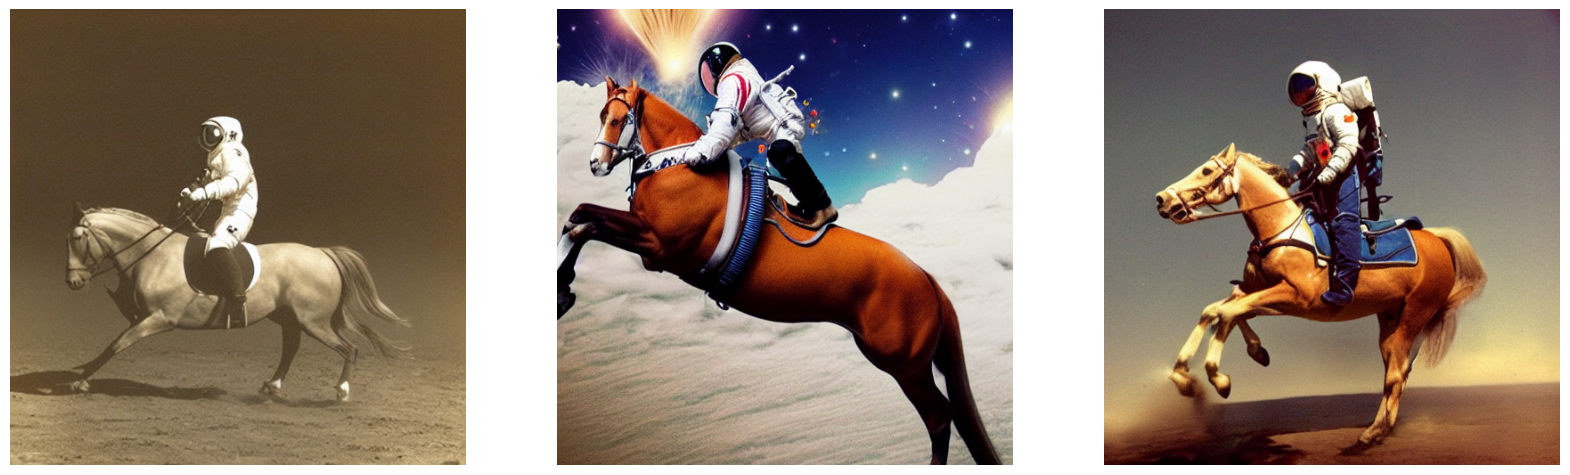

In [4]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

Pretty incredible!

But that's not all this model can do.  Let's try a more complex prompt:

50/50 [==============================] - 132s 3s/step


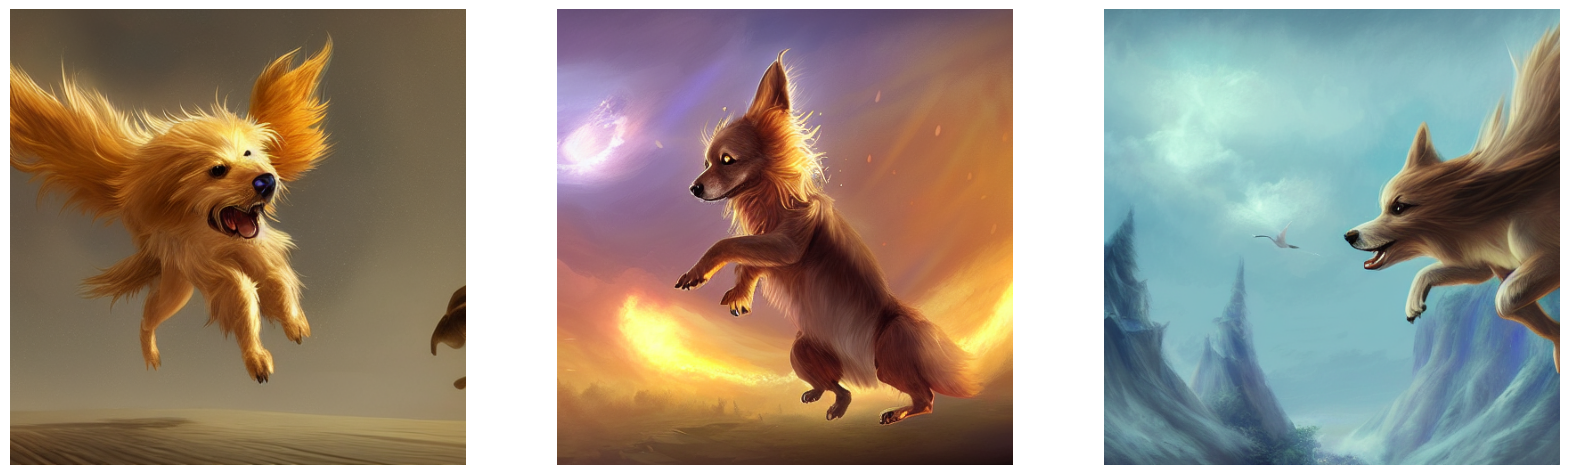

In [5]:
images = model.text_to_image(
    "cute magical flying dog, fantasy art, "
    "golden color, high quality, highly detailed, elegant, sharp focus, "
    "concept art, character concepts, digital painting, mystery, adventure",
    batch_size=3,
)
plot_images(images)

The possibilities are literally endless (or at least extend to the boundaries of
Stable Diffusion's latent manifold).

50/50 [==============================] - 137s 3s/step
Standard model: 139.84 seconds


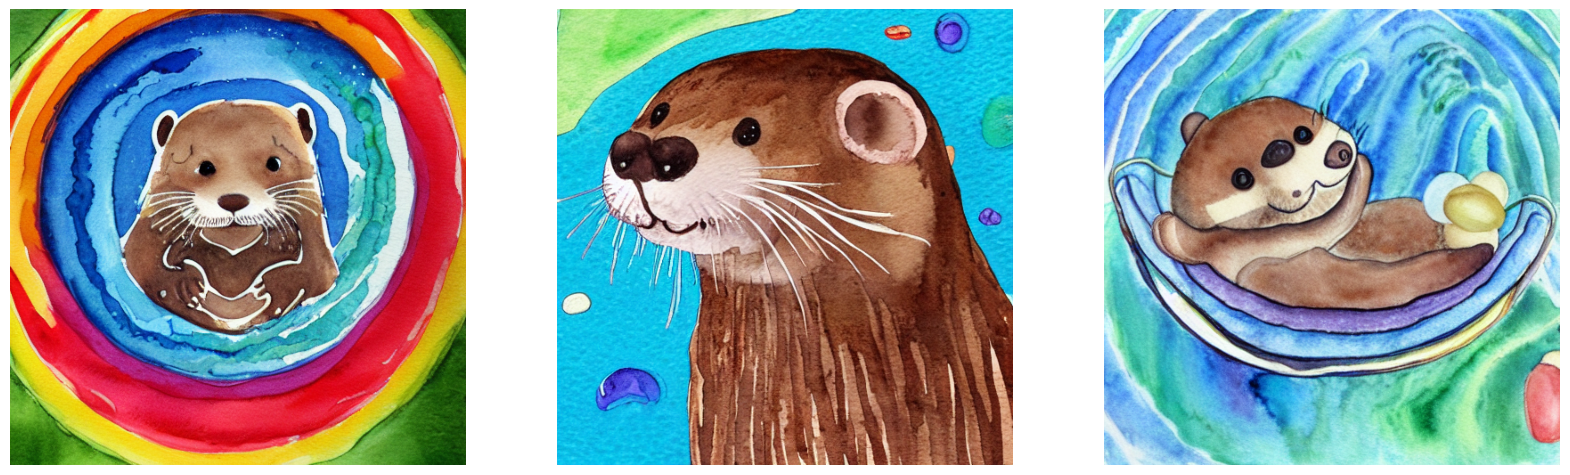

In [6]:
benchmark_result = []
start = time.time()
images = model.text_to_image(
    "A cute otter in a rainbow whirlpool holding shells, watercolor",
    batch_size=3,
)
end = time.time()
benchmark_result.append(["Standard", end - start])
plot_images(images)

print(f"Standard model: {(end - start):.2f} seconds")
keras.backend.clear_session()  # Clear session to preserve memory.

Enter image description (q breaks)
Phd students in Lublin thinking about artificial intelliegence
50/50 [==============================] - 142s 3s/step
Phd students in Lublin thinking about artificial intelliegence
Standard model: 145.19 seconds


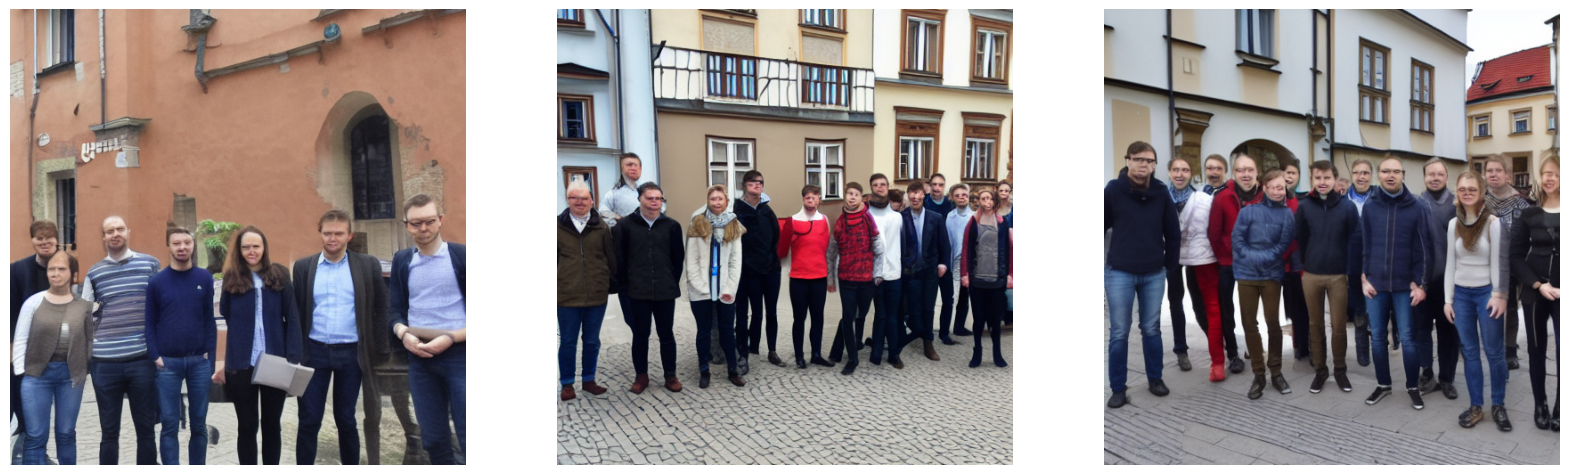

Enter image description (q breaks)


In [ ]:
while True:
  print("Enter image description (q breaks)")
  prompt=input()
  if input=='q':
    break;
  benchmark_result = []
  start = time.time()
  images = model.text_to_image(
    prompt,
    batch_size=3,
  )
  end = time.time()
  benchmark_result.append(["Standard", end - start])
  plot_images(images)
  print(prompt)

  print(f"Standard model: {(end - start):.2f} seconds")
  keras.backend.clear_session()  # Clear session to preserve memory.
  plt.show()